# Logistic Regression for COVID-19 ML Project
## By:
### Abdel-Rahman Ibrahim El Said Ahmed Megahed  18P7423
### Youssef Mohamed Mostafa Mansi                           18P5848

In [1]:
#required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
#load data into pandas dataframe
df = pd.read_csv('data.csv', index_col = 0)

In [3]:
#Top 10 most repeated locations in the data for one hot encoding
top_10_loc = [x for x in df.location.value_counts().sort_values(ascending = False).head(10).index]
top_10_loc

[108, 45, 44, 114, 110, 106, 99, 116, 85, 117]

In [4]:
#optimizing the dataframe to show data
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
#One Hot Encoding the locations
for label in top_10_loc:
    df["L" + str(int(label))] = np.where(df['location']==label,1,0)

In [5]:
#Top 10 most repeated countries in the data for one hot encoding
top_10_country = [y for y in df.country.value_counts().sort_values(ascending = False).head(10).index]
top_10_country

[18, 8, 13, 24, 12, 29, 11, 28, 25, 23]

In [6]:
#One Hot Encoding the countries
for label in top_10_country:
    df["C"+str(int(label))] = np.where(df['country']==label,1,0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result,L108,L45,L44,L114,L110,L106,L99,L116,L85,L117,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
#dropping the country & location columns
df = df.drop(['country'],axis=1)
df = df.drop(['location'],axis=1)

In [8]:
#dropping then adding the result column to the end of the dataset
res_df = df['result']
res_df
df = df.drop(['result'],axis=1)
df['result']= res_df
df

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,L108,L45,L44,L114,L110,L106,L99,L116,L85,L117,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23,result
0,1,66.0,1,0,14,31,19,12,3,1,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2,24.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
859,2,35.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
861,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#split dataset
X = df.iloc[:, 0:31].values
y = df.iloc[:, -1].values
X_train , X_test, y_train , y_test = train_test_split(X,y, random_state = 3 , test_size = 0.2,shuffle = True)

In [10]:
#logistic regression
logreg = LogisticRegression(C=1e5,class_weight=None, max_iter=900,solver = "liblinear")

In [11]:
#Optimizing the hyperparameters using grid search function
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
y_pred=logreg_cv.predict(X_test)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.9536231884057973


In [12]:
#Confusion matrix for True/False positives,True/False negatives
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[150,   5],
       [  6,  12]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

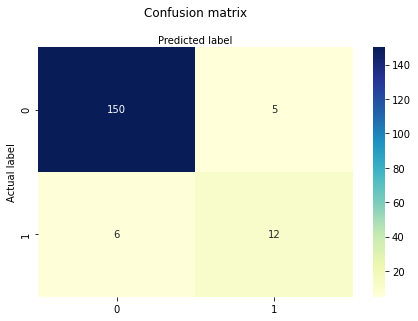

In [13]:
#Confusion Matrix plotting
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
#Accuracy,precision and recall scores
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9364161849710982
Precision: 0.7058823529411765
Recall: 0.6666666666666666


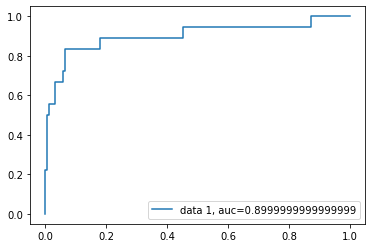

In [15]:
#Roc_AUC score & Plotting
y_pred_proba = logreg_cv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()